<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Customer_Segmentation/K_mean_clustering_Final_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_csv("Final_Customer_Data.csv")

In [ ]:
# Standardize the features for better performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Using the Elbow Method to find the optimal number of clusters (K)
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

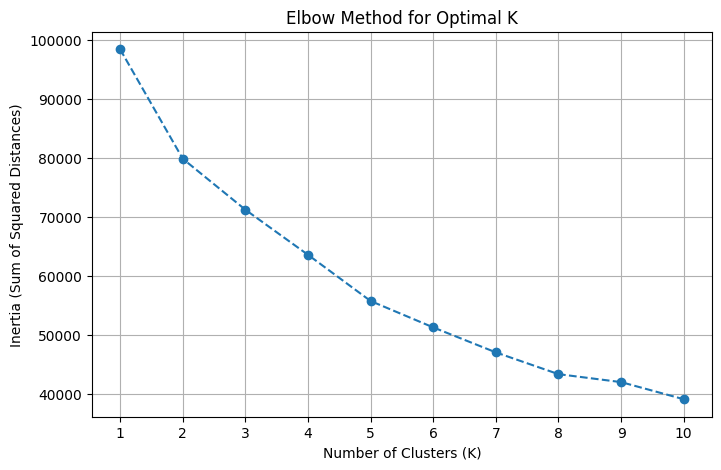

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Function to calculate the optimal K based on gradient
def find_optimal_k_from_plot(k_range, inertia):
    # Calculate gradients (rate of change in inertia)
    gradients = np.diff(inertia)

    # Calculate the change in gradient (second derivative)
    gradient_diff = np.abs(np.diff(gradients))

    # Find the index with the maximum gradient change (elbow point)
    optimal_k_index = np.argmax(gradient_diff) + 1  # Add 1 to adjust for the range of K

    return k_range[optimal_k_index]

# Find the optimal K using the function
k_values = list(k_range)  # Convert k_range to a list
optimal_k = find_optimal_k_from_plot(k_values, inertia)

print(f"The optimal number of clusters (K) is: {optimal_k}")


The optimal number of clusters (K) is: 2


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Optimal number of clusters from the Elbow Method
optimal_k = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster assignments
print(data.head())


       BALANCE  BALANCE_FREQUENCY  INSTALLMENTS_PURCHASES  \
0    99.000000           0.818182                    95.4   
1  3202.467416           0.909091                     0.0   
2  2495.148862           1.000000                     0.0   
3  1666.670542           0.636364                     0.0   
4   817.714335           1.000000                     0.0   

   CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.000000        1000.0   201.802084        139.509787   
1                0.250000        7000.0  4103.032597       1072.340217   
2                0.000000        7500.0   622.066742        627.284787   
3                0.083333        7500.0     0.000000        379.829982   
4                0.000000        1200.0   678.334763        244.791237   

   PRC_FULL_PAYMENT  Total_Purchase  Avg_Purchase_Frequency  Total_Trx  \
0          0.000000       95.400000                0.083334          2   
1          0.222222     6442.945483     

In [ ]:
# Check the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts()
print("\nNumber of customers in each cluster:")
print(cluster_counts)


Number of customers in each cluster:
Cluster
1    7291
0    1659
Name: count, dtype: int64


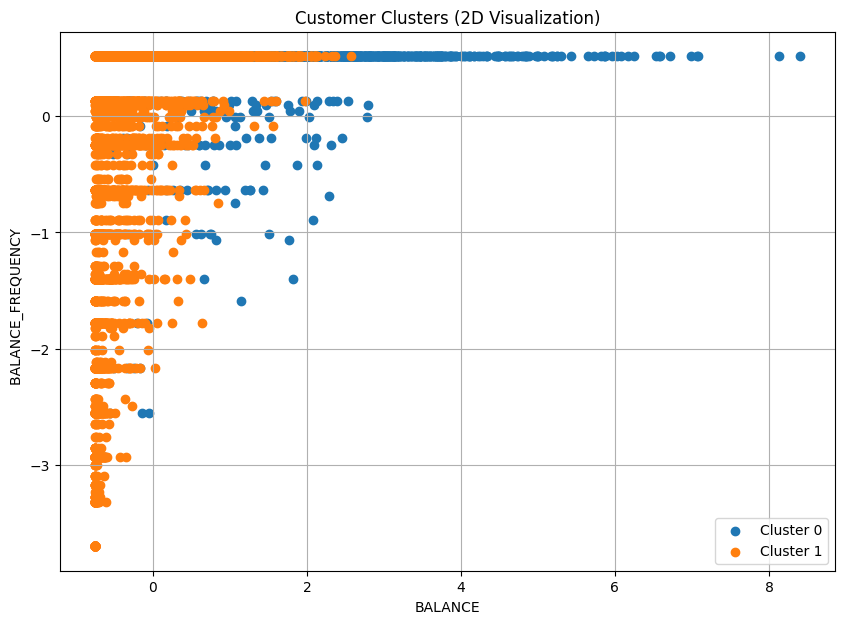

In [ ]:
# Plot the clusters using the first two features
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = scaled_features[kmeans.labels_ == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')


plt.title('Customer Clusters (2D Visualization)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY  ')
plt.legend()
plt.grid(True)
plt.show()


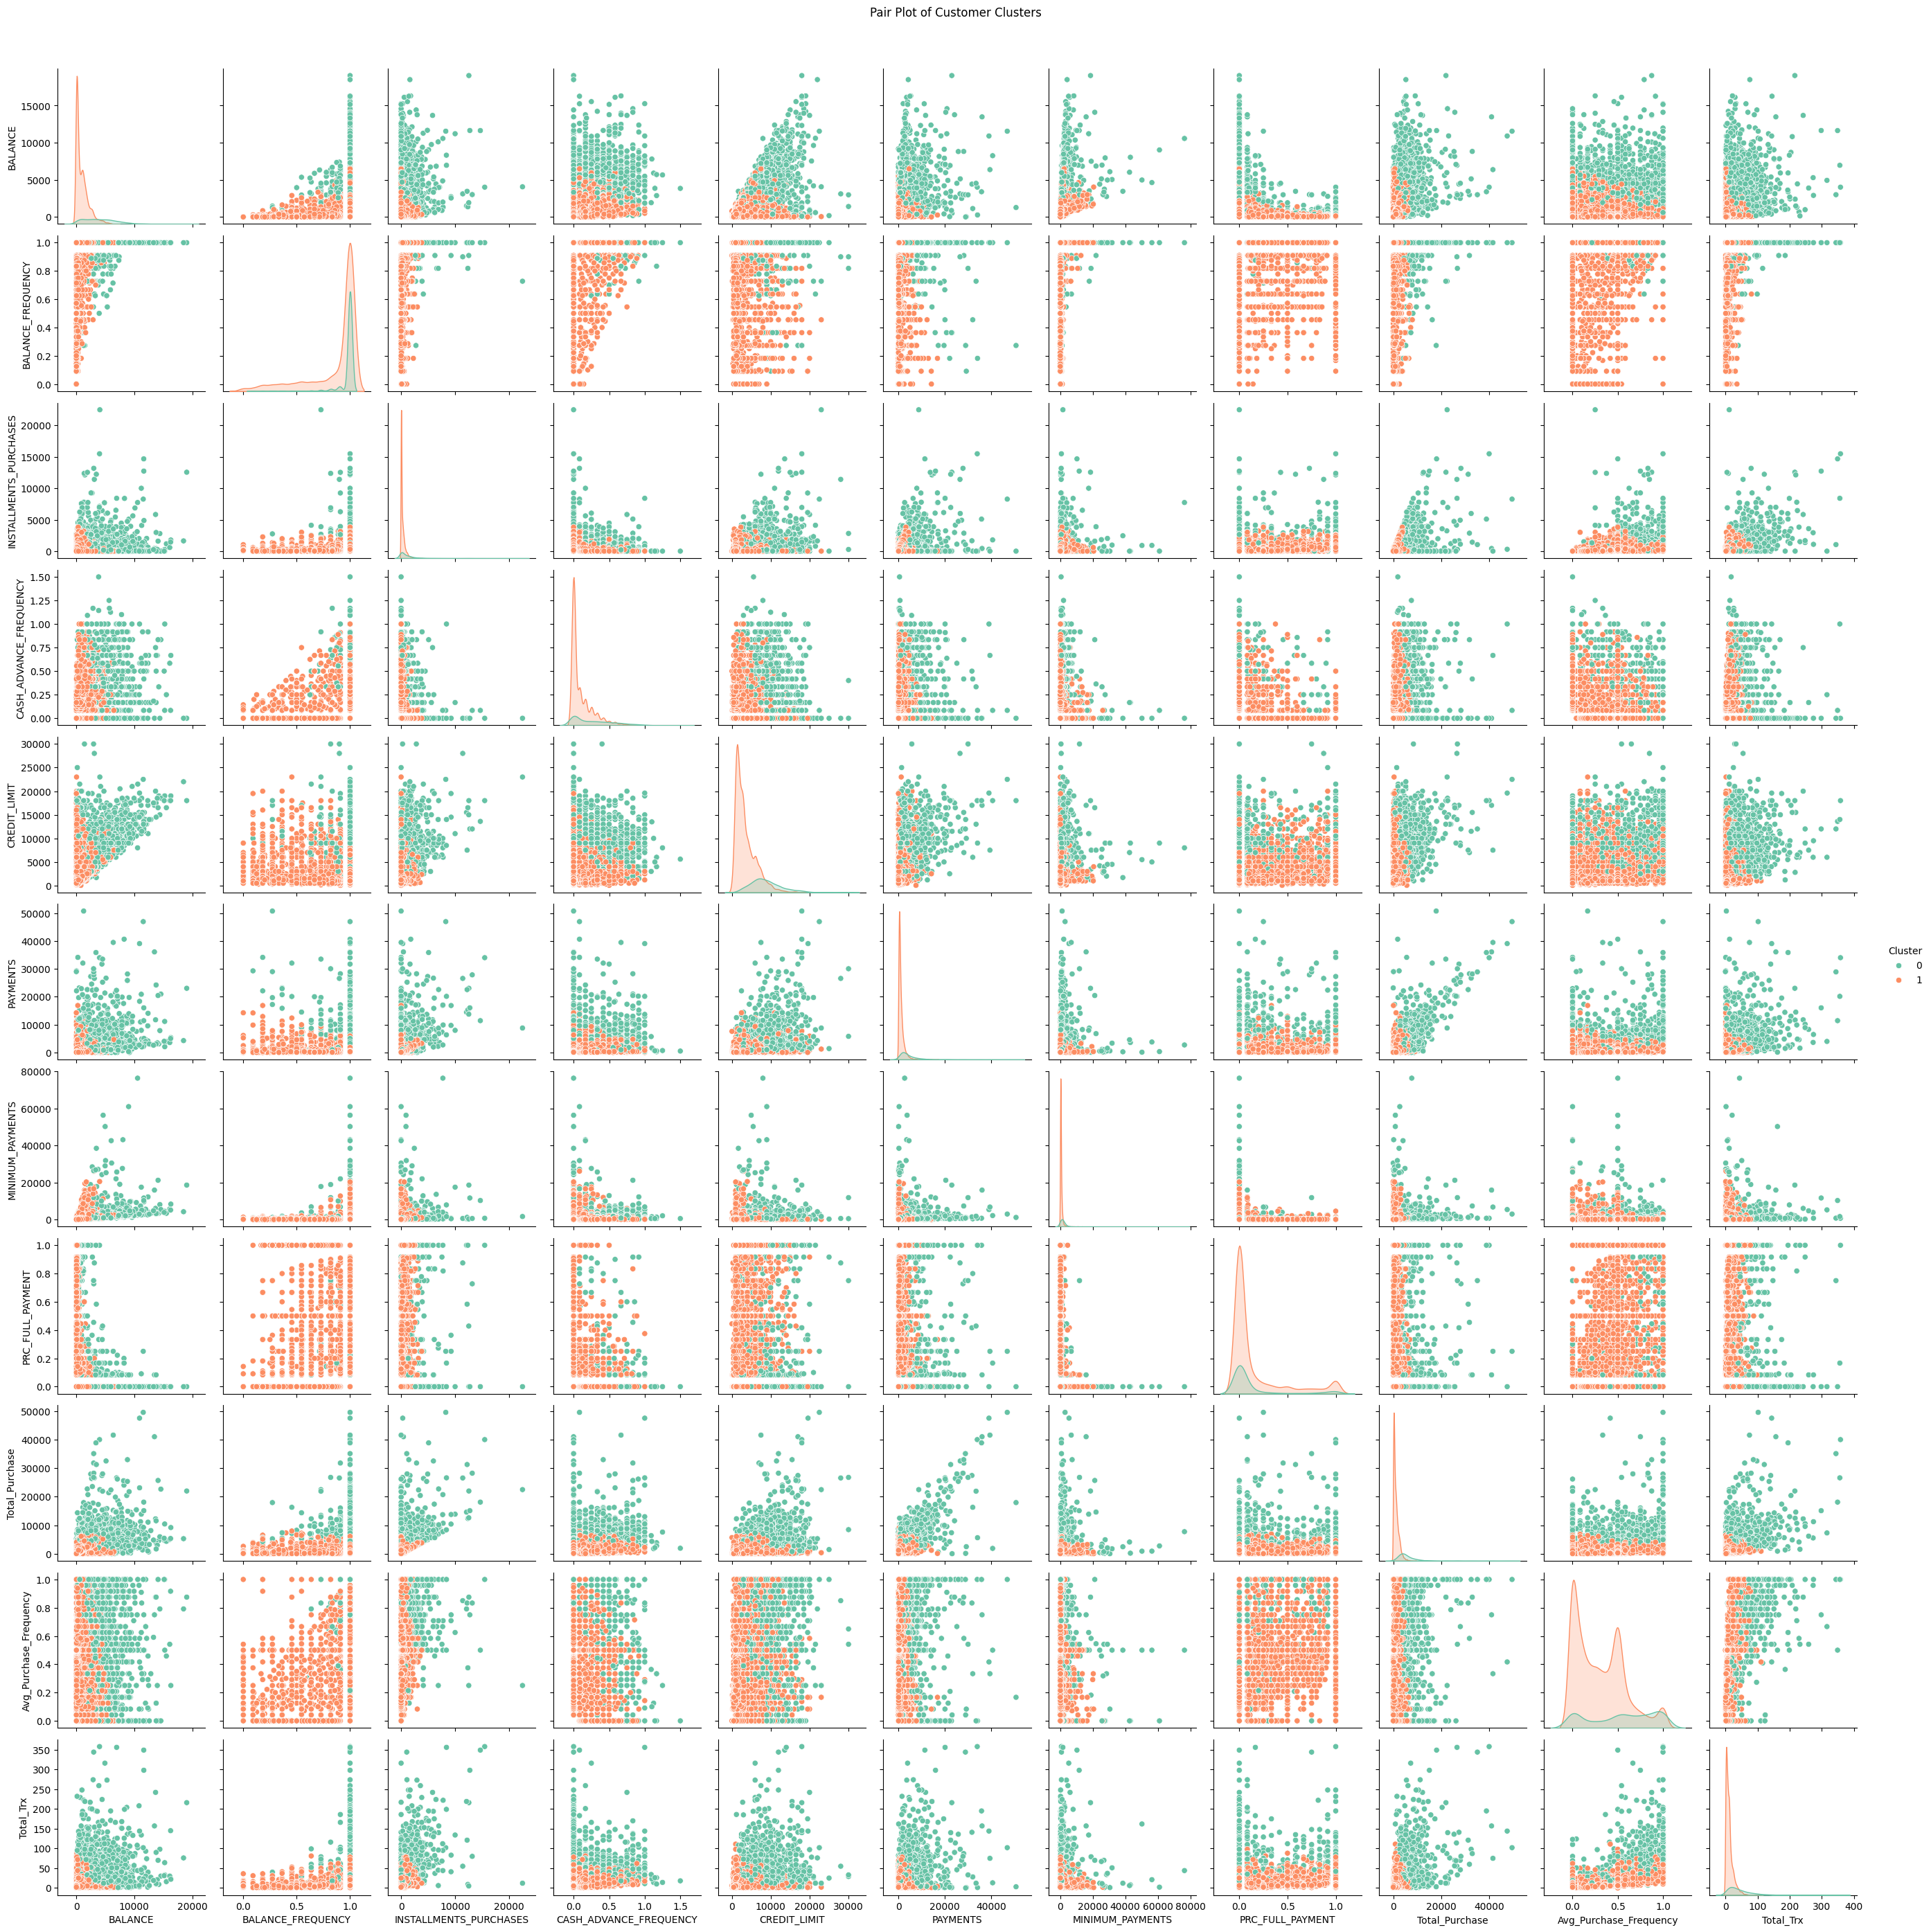

In [ ]:
import seaborn as sns

# Add cluster labels to the original dataset for pair plot
data['Cluster'] = kmeans.labels_

# Visualize clusters using pair plot
sns.pairplot(data, hue='Cluster', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Customer Clusters', y=1.02)
plt.show()
